## DATA CLEANING NOTEBOOK

In [38]:
import pandas as pd
import re
import numpy as np
import random
import matplotlib.pyplot as plt

### Reading the CVS file

In [25]:
CrimeAnalysis_df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
CrimeAnalysis_df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [39]:
CrimeAnalysis_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

## Columns full forms

DR_NO - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.

DATE OCC - Date of crime occurrence(YYYY-MM-DD)

AREA - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

AREA NAME - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.

Rpt Dist No - Code that represents a sub-area within a Geographic Area.

Crm Cd - Indicates the crime committed.

Crm Cd Desc - Defines the Crime Code provided.

Vict Age - Indicates the age of the victim.

Vict Sex - F: Female M: Male X: Unknown

Vict Descent - Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

Premis Cd - The type of structure, vehicle, or location where the crime took place.

Premis Desc - Defines the Premise Code provided.

Weapon Used Cd - The type of weapon used in the crime.

Weapon Desc - Defines the Weapon Used Code provided.

LOCATION - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

LAT - Latitude Coordinate.

LON - Longitude Coordinate.

## Total number of null values

In [26]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function

CrimeAnalysis_df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            78051
Vict Age               0
Vict Sex           74711
Vict Descent       74716
Premis Cd              5
Premis Desc          259
Weapon Used Cd    363785
Weapon Desc       363785
Status                 0
Status Desc            0
Crm Cd 1               6
Crm Cd 2          520859
Crm Cd 3          562694
Crm Cd 4          564122
LOCATION               0
Cross Street      468813
LAT                    0
LON                    0
dtype: int64

## Graphical representation of null values in data

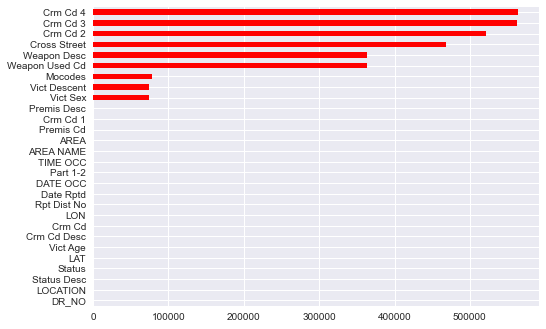

In [29]:
CrimeAnalysis_df.isnull().sum().sort_values(ascending=True).plot.barh(color='red')
plt.style.use('seaborn')

plt.show()

In [31]:
CrimeAnalysis_df.dropna(subset=['Weapon Used Cd'], inplace=True)

In [32]:
#There are Null values in victim Sex
#Victim Sex can't be Null value. So, replacing it with X and considering it as unknow.
#Let's consider Unknow Descent of victim as X

CrimeAnalysis_df.loc[pd.isnull(CrimeAnalysis_df['Vict Sex']), ['Vict Sex']] = 'X'
CrimeAnalysis_df.loc[pd.isnull(CrimeAnalysis_df['Vict Descent']), ['Vict Descent']] = 'X'

In [41]:
#Replacing the null values in Crm Cd 2, Crm Cd 3, Crm Cd 4 Columns
CrimeAnalysis_df['Crm Cd 2']=CrimeAnalysis_df['Crm Cd 2'].mask(CrimeAnalysis_df['Crm Cd 2']==0).fillna(30)
CrimeAnalysis_df['Crm Cd 3']=CrimeAnalysis_df['Crm Cd 3'].mask(CrimeAnalysis_df['Crm Cd 3']==0).fillna(30)
CrimeAnalysis_df['Crm Cd 4']=CrimeAnalysis_df['Crm Cd 4'].mask(CrimeAnalysis_df['Crm Cd 4']==0).fillna(30)

In [42]:
CrimeAnalysis_df.fillna(method='ffill', inplace=True)

## Inspecting the of Null values again

In [43]:
CrimeAnalysis_df.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      3
LAT               0
LON               0
dtype: int64

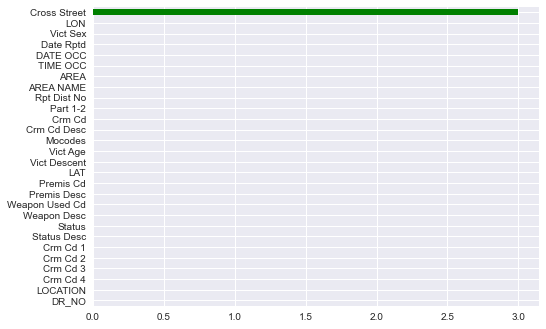

In [37]:
CrimeAnalysis_df.isnull().sum().sort_values(ascending=True).plot.barh(color='green')
plt.style.use('seaborn')

plt.show()

## Different types of Weapoms used in crime

In [49]:
CrimeAnalysis_df['Weapon Desc'].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'ROCK/THROWN OBJECT',
       'VERBAL THREAT', 'FOLDING KNIFE', 'BLUNT INSTRUMENT', 'BOTTLE',
       'SEMI-AUTOMATIC PISTOL', 'CLUB/BAT', 'OTHER CUTTING INSTRUMENT',
       'HAND GUN', 'PHYSICAL PRESENCE', 'VEHICLE', 'SCISSORS', 'STICK',
       'MACHETE', 'OTHER KNIFE', 'SHOTGUN',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIRE', 'GLASS',
       'SIMULATED GUN', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'DEMAND NOTE', 'BOMB THREAT', 'PIPE/METAL PIPE', 'ICE PICK',
       'UNKNOWN FIREARM', 'MACE/PEPPER SPRAY', 'HAMMER', 'RAZOR',
       'OTHER FIREARM', 'BELT FLAILING INSTRUMENT/CHAIN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'SCREWDRIVER', 'KITCHEN KNIFE',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BRASS KNUCKLES', 'REVOLVER',
       'SWITCH BLADE', 'STUN GUN', 'AXE', 'RIFLE',
       'ASSAULT WEAPON/UZI/AK47/ETC', 'ANTIQUE FIREARM', 'FIXED OBJECT',
       'SEMI-AUTOMATIC RIFLE', 'C

## Last and Final check to determine whether there are any remaining duplicates

In [50]:
CrimeAnalysis_df.loc[CrimeAnalysis_df.duplicated(), :]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


# Now the Data is Cleansed and so we can move forward with EDA

In [70]:
Final_df='EDA_data'
CrimeAnalysis_df.to_csv("{}.csv".format(Final_df),index = False)

In [71]:
df = pd.read_csv('EDA_data.csv')

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(1100)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,30.0,30.0,30.0,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,30.0,30.0,30.0,700 S HILL ST,NaN,34.0459,-118.2545
2,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,121.0,998.0,30.0,30.0,700 S BROADWAY,NaN,34.0452,-118.2534
3,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,330.0,30.0,30.0,30.0,15TH,OLIVE,34.0359,-118.2648
4,200100510,01/05/2020 12:00:00 AM,01/05/2020 12:00:00 AM,955,1,Central,111,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421 0906,35,M,O,108.0,PARKING LOT,511.0,VERBAL THREAT,IC,Invest Cont,930.0,30.0,30.0,30.0,800 N ALAMEDA ST,OLIVE,34.0615,-118.2412
5,200100515,01/07/2020 12:00:00 AM,01/07/2020 12:00:00 AM,1638,1,Central,162,1,648,ARSON,1402 1501 2004,0,X,X,404.0,DEPARTMENT STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,648.0,998.0,30.0,30.0,700 W 7TH ST,OLIVE,34.0480,-118.2577
6,211916029,11/26/2021 12:00:00 AM,11/30/2020 12:00:00 AM,730,19,Mission,1916,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 1814 0416,24,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626.0,30.0,30.0,30.0,14200 BERG ST,OLIVE,34.3055,-118.4439
7,201116159,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,2018,11,Northeast,1124,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0400 0416 1814 2000,34,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,30.0,30.0,30.0,3200 W AVENUE 32,OLIVE,34.1186,-118.2450
8,200506268,02/22/2020 12:00:00 AM,02/22/2020 12:00:00 AM,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0319 0344 0429 0448 0305,29,F,W,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,440.0,624.0,30.0,30.0,PACIFIC COAST,VERMONT,33.7926,-118.3043
9,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,0416 0411 0344 1822 0305 0334 2004 1414 1202 1218,66,M,B,103.0,ALLEY,204.0,FOLDING KNIFE,IC,Invest Cont,210.0,30.0,30.0,30.0,7TH,HILL,34.0463,-118.2550


In [66]:
df.shape

(200378, 28)

Total number of rows in the Data are 200378 and 28 columns

## Data Information 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200378 entries, 0 to 200377
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           200378 non-null  int64  
 1   Date Rptd       200378 non-null  object 
 2   DATE OCC        200378 non-null  object 
 3   TIME OCC        200378 non-null  int64  
 4   AREA            200378 non-null  int64  
 5   AREA NAME       200378 non-null  object 
 6   Rpt Dist No     200378 non-null  int64  
 7   Part 1-2        200378 non-null  int64  
 8   Crm Cd          200378 non-null  int64  
 9   Crm Cd Desc     200378 non-null  object 
 10  Mocodes         200378 non-null  object 
 11  Vict Age        200378 non-null  int64  
 12  Vict Sex        200378 non-null  object 
 13  Vict Descent    200378 non-null  object 
 14  Premis Cd       200378 non-null  float64
 15  Premis Desc     200378 non-null  object 
 16  Weapon Used Cd  200378 non-null  float64
 17  Weapon Des

## Data Types

In [68]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

## Describition of Data 

In [69]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.003780e+05,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000
mean,2.102554e+08,1351.535987,10.510355,1097.237865,1.545220,507.297118,34.469048,313.177300,361.379697,506.586671,157.963484,36.376458,30.186488,33.920541,-117.848849
std,7.940633e+06,673.198024,6.211493,619.734302,0.497952,240.614598,17.869807,214.714775,124.195874,240.107025,320.890655,77.824900,13.373951,2.193052,7.610327
min,1.030447e+07,1.000000,1.000000,101.000000,1.000000,110.000000,-1.000000,101.000000,101.000000,110.000000,30.000000,30.000000,30.000000,0.000000,-118.667200
25%,2.015070e+08,910.000000,5.000000,524.000000,1.000000,230.000000,24.000000,102.000000,308.000000,230.000000,30.000000,30.000000,30.000000,33.996900,-118.402200
50%,2.108085e+08,1435.000000,11.000000,1162.000000,2.000000,624.000000,33.000000,210.000000,400.000000,624.000000,30.000000,30.000000,30.000000,34.050100,-118.304600
75%,2.202061e+08,1915.000000,16.000000,1619.000000,2.000000,626.000000,46.000000,502.000000,400.000000,626.000000,30.000000,30.000000,30.000000,34.118100,-118.269600
max,2.299050e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


## All checks have been completed, and the data has been cleansed for the further stages and analysis.